In [2]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.9 MB/s eta 0:00:00


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd

column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
]

try:
    # Ensure the correct filename 'adult 3.csv' is used.
     df = pd.read_csv(r"/content/drive/MyDrive/adult 3.csv", header=None, names=column_names, na_values='?', skipinitialspace=True, skiprows=[0])
     print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'adult 3.csv' not found. Please ensure the dataset is in the correct directory.")
    df = pd.DataFrame(columns=column_names) # Create an empty DataFrame if loading fails

Dataset loaded successfully!


--- Initial Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
   age  workclass  fnlwgt     education  education-num      marital

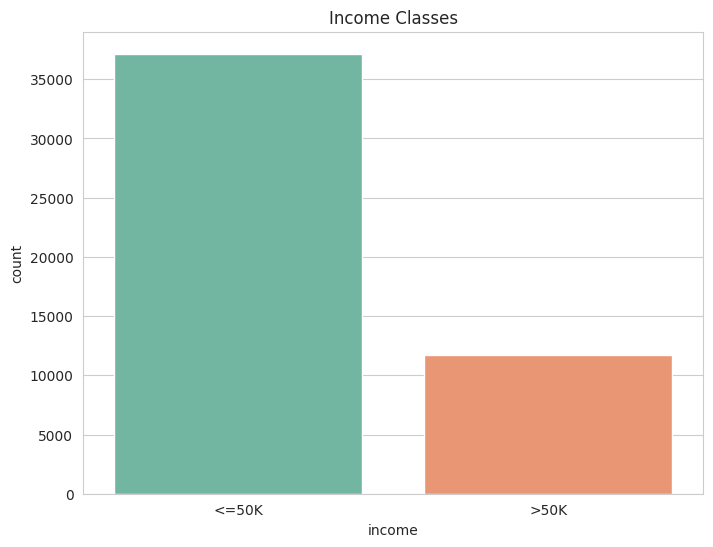

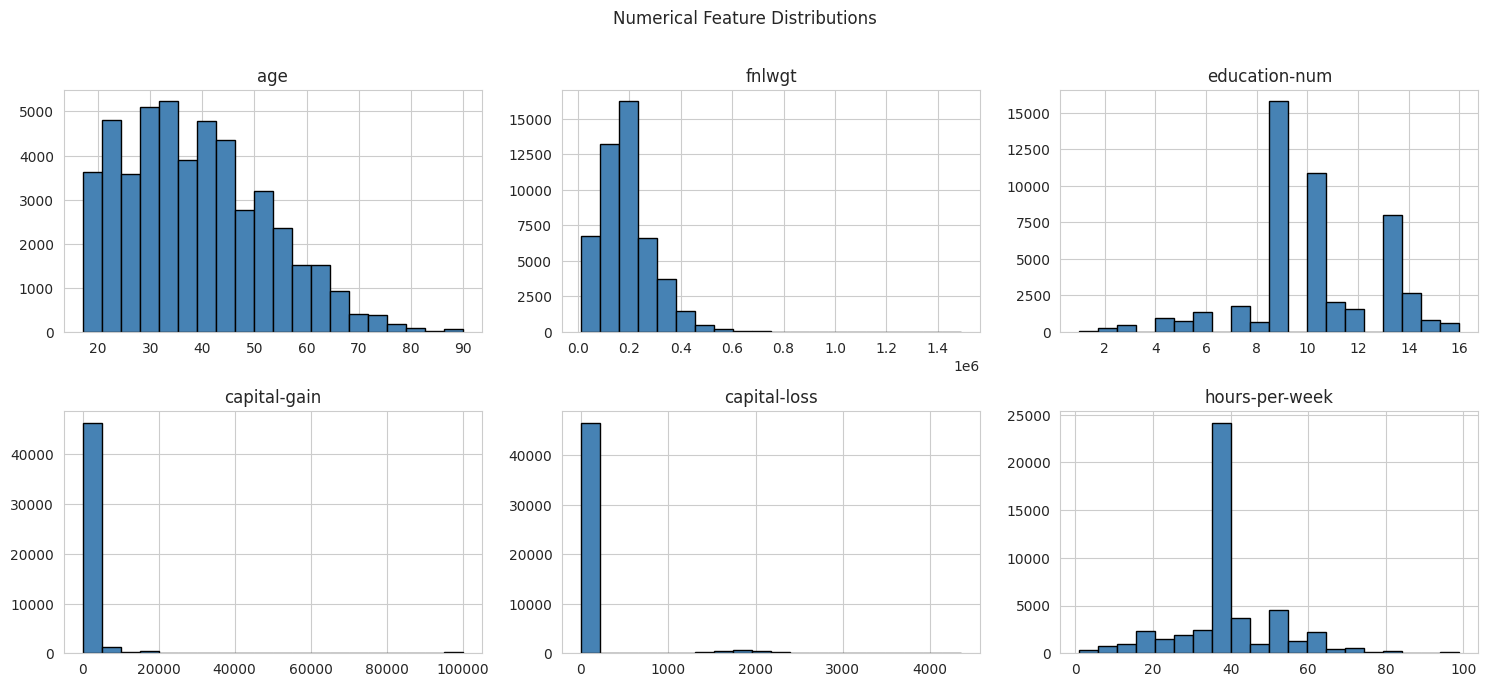

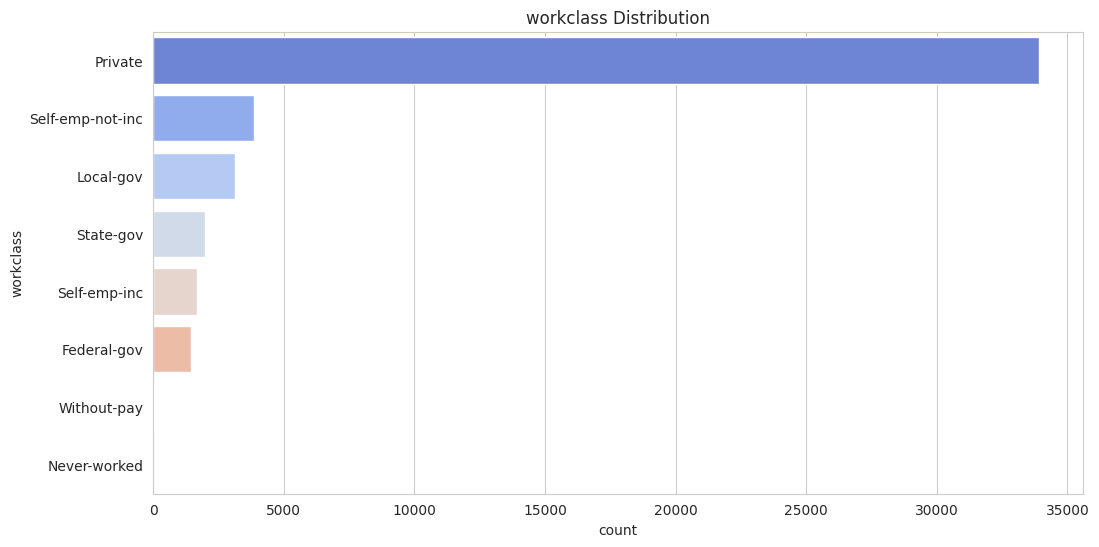

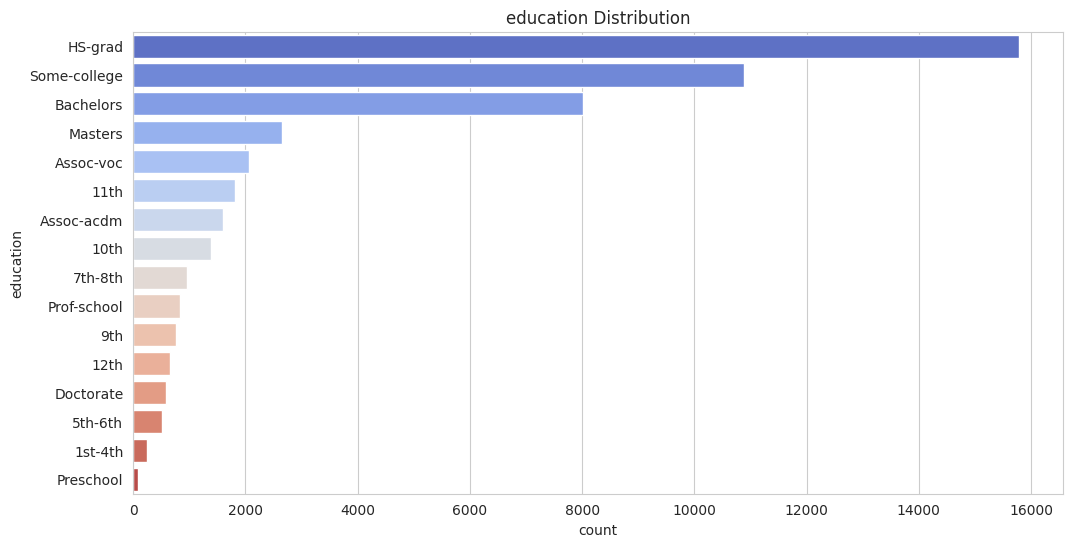

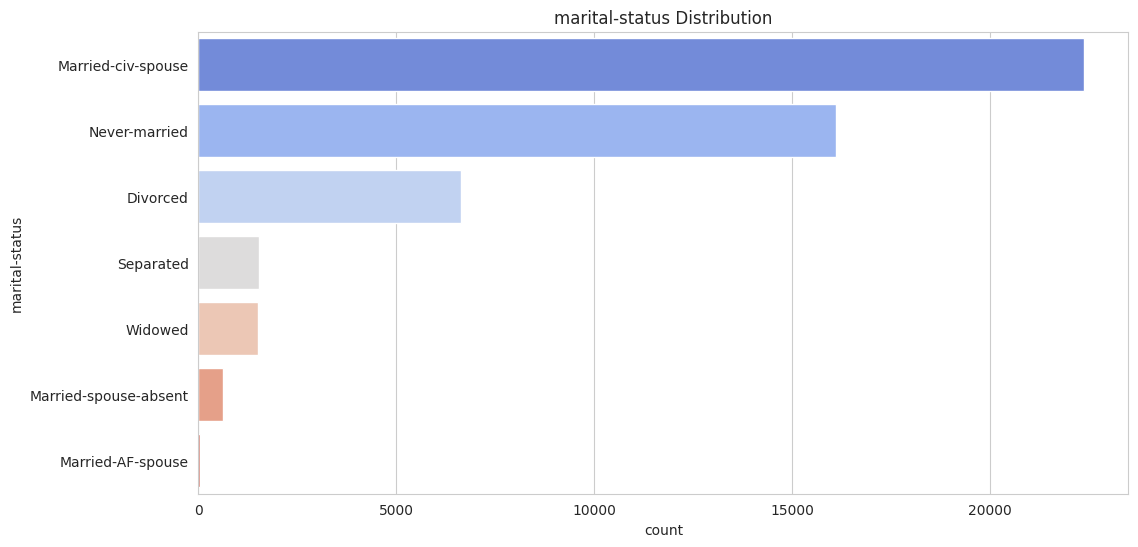

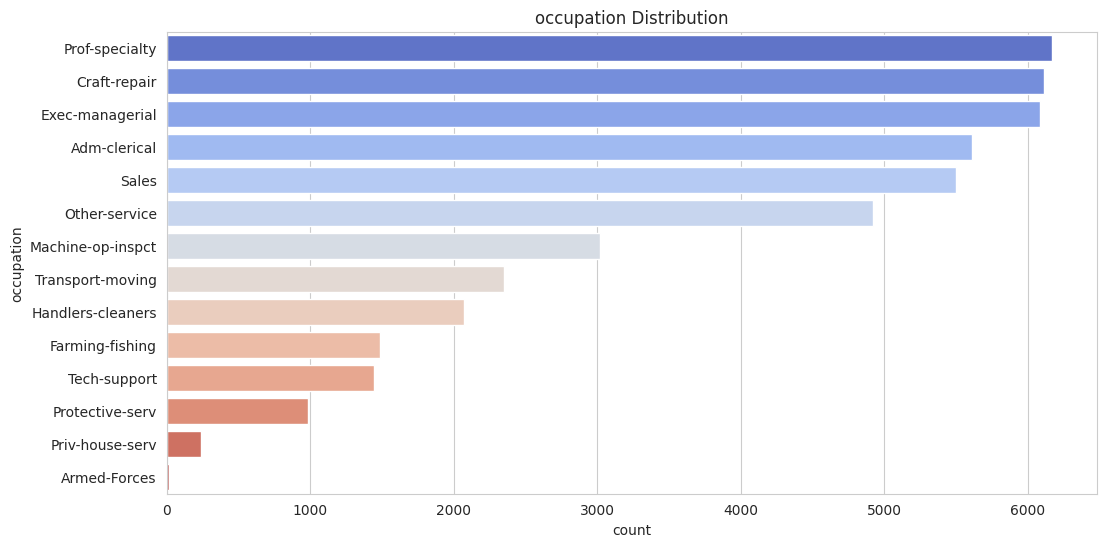

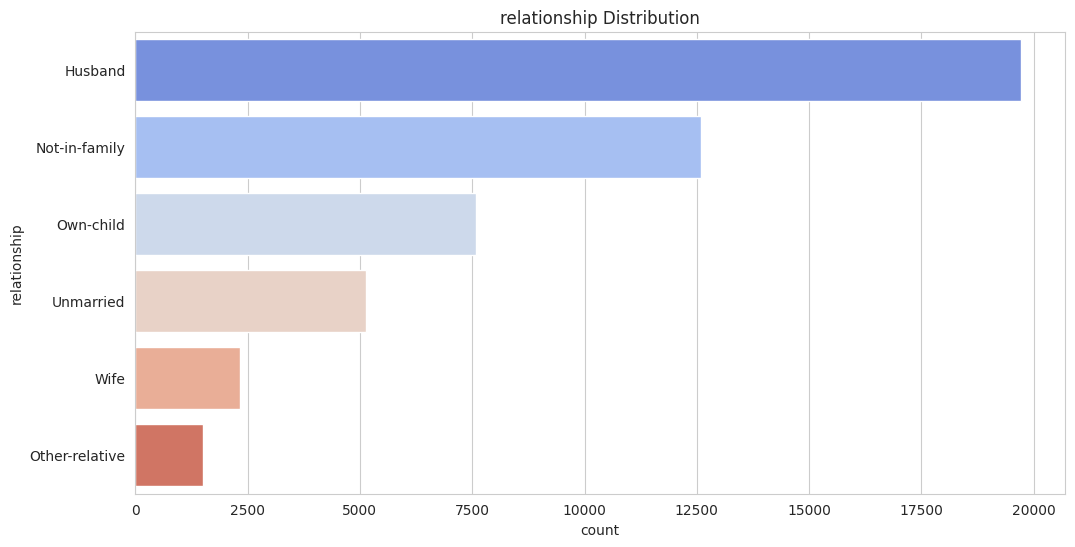

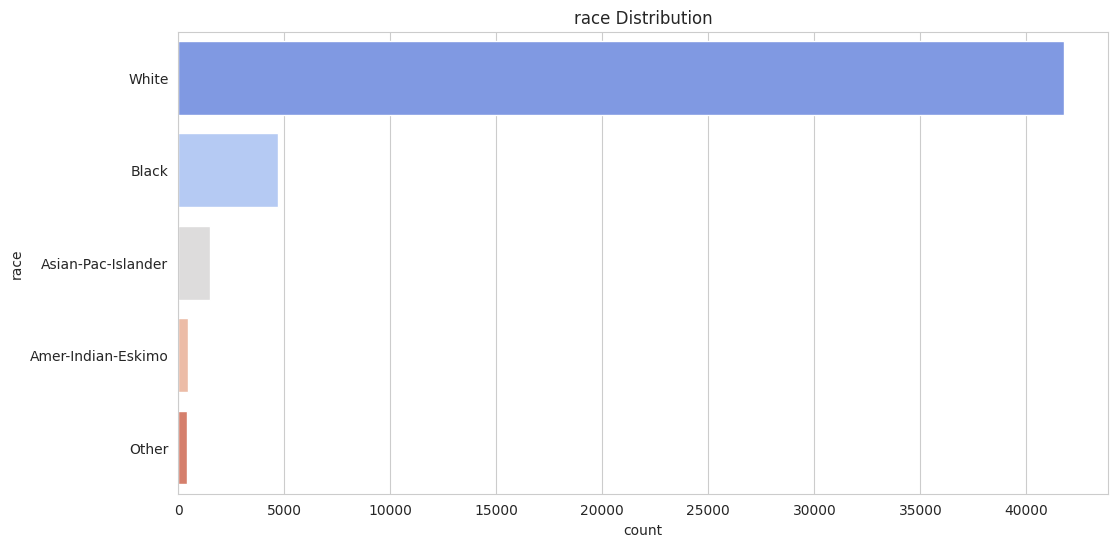

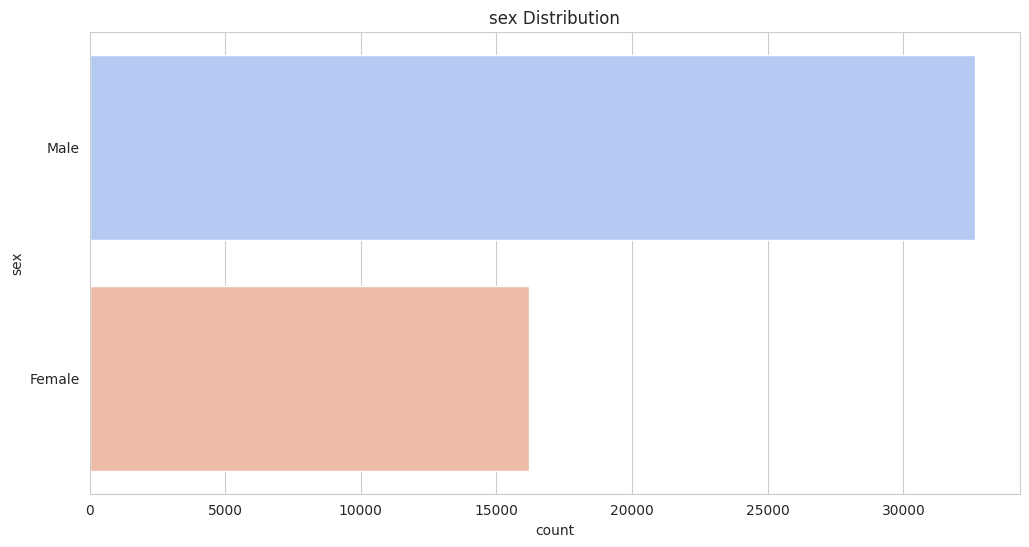

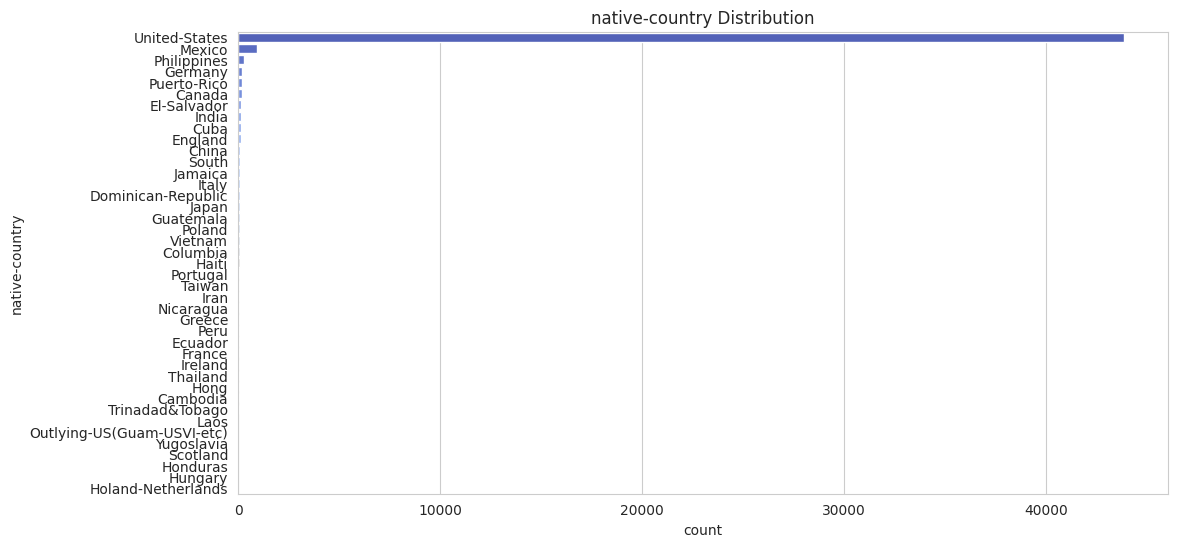

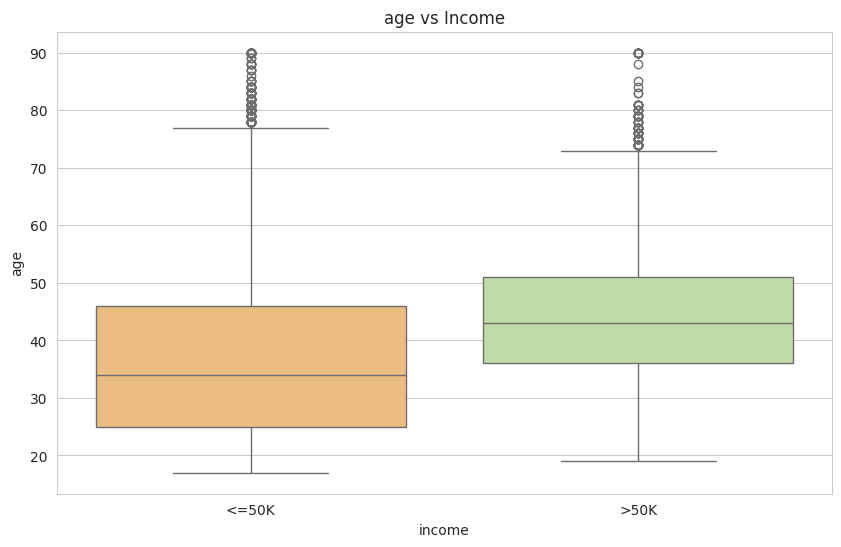

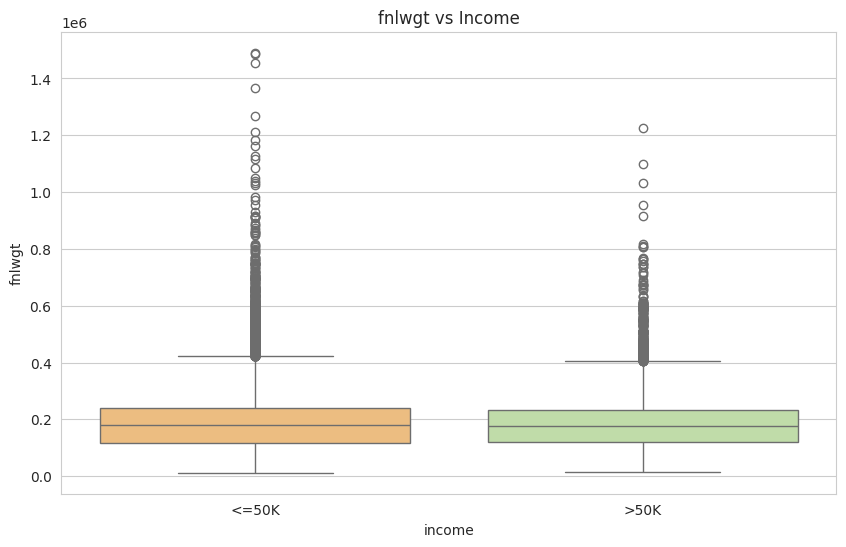

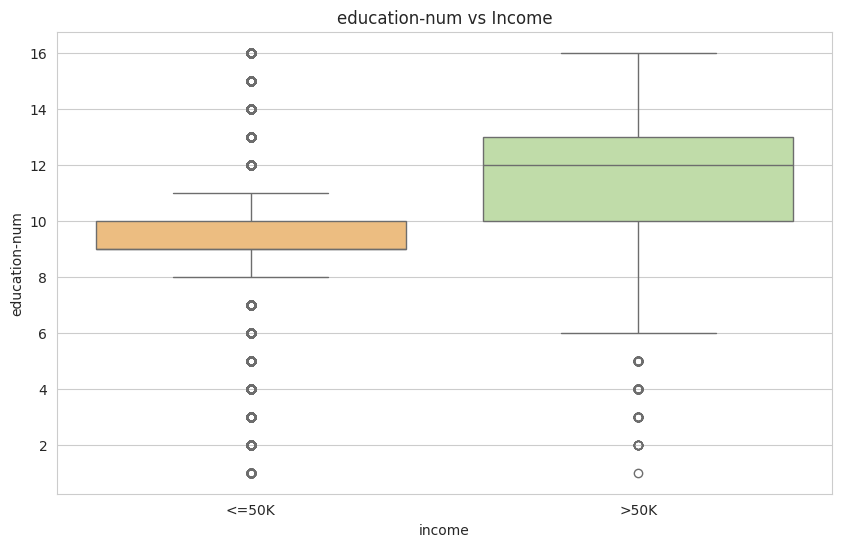

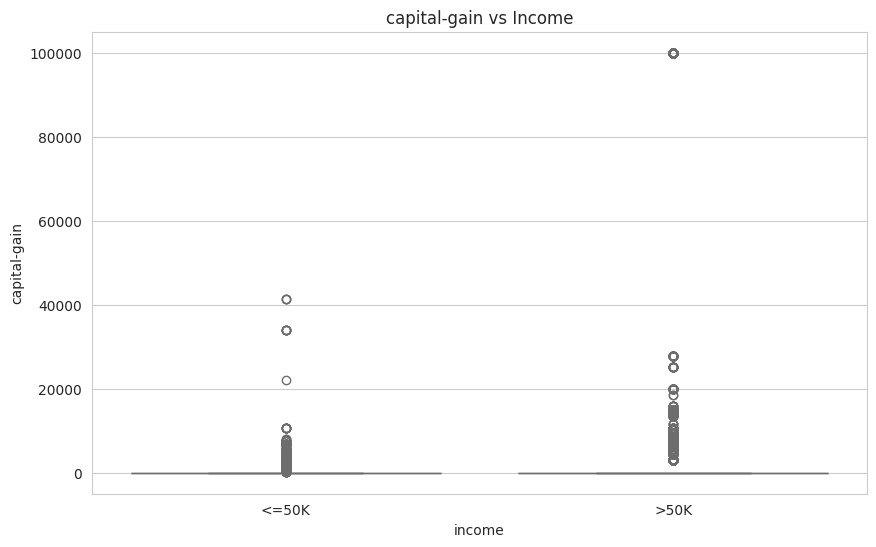

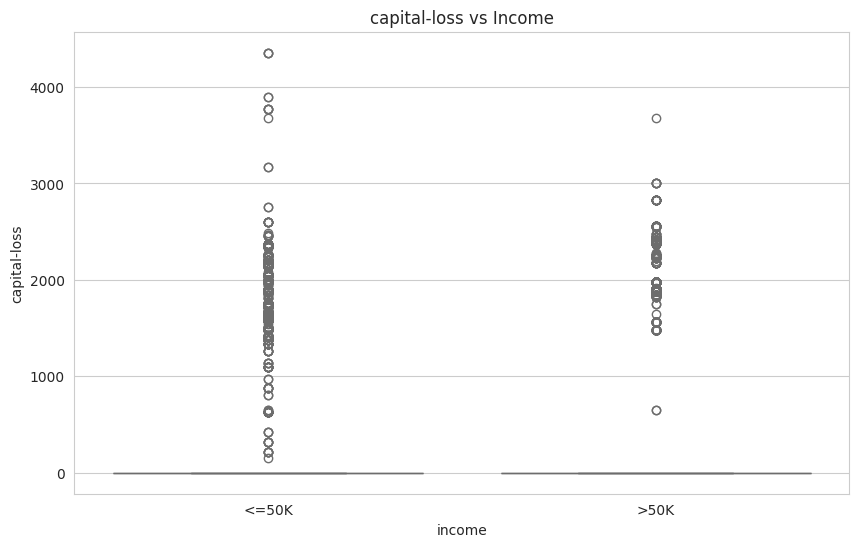

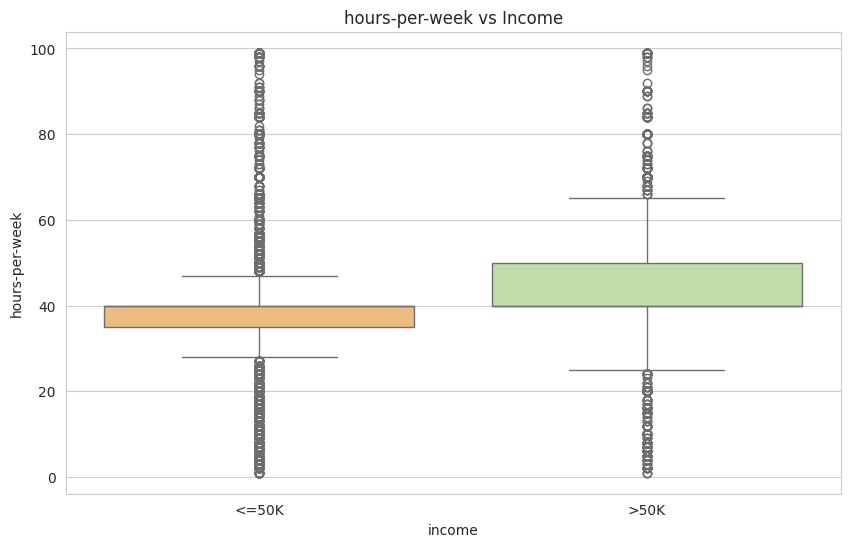

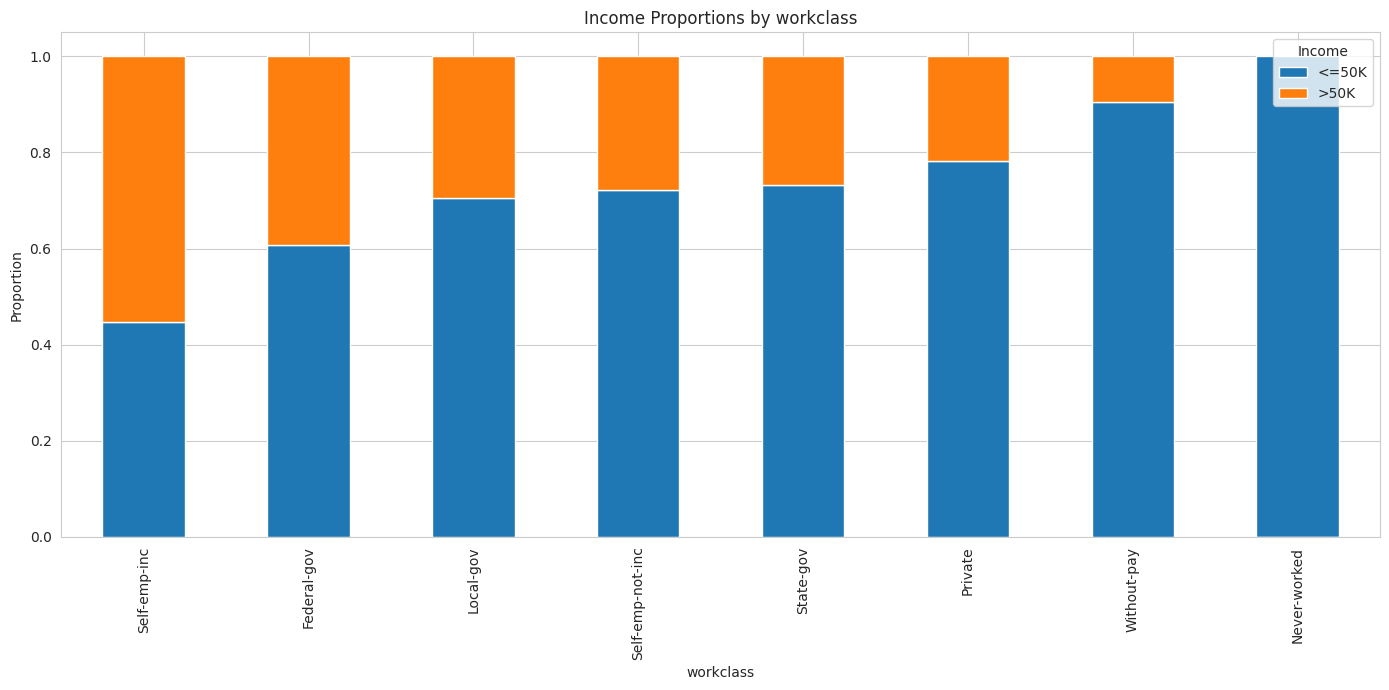

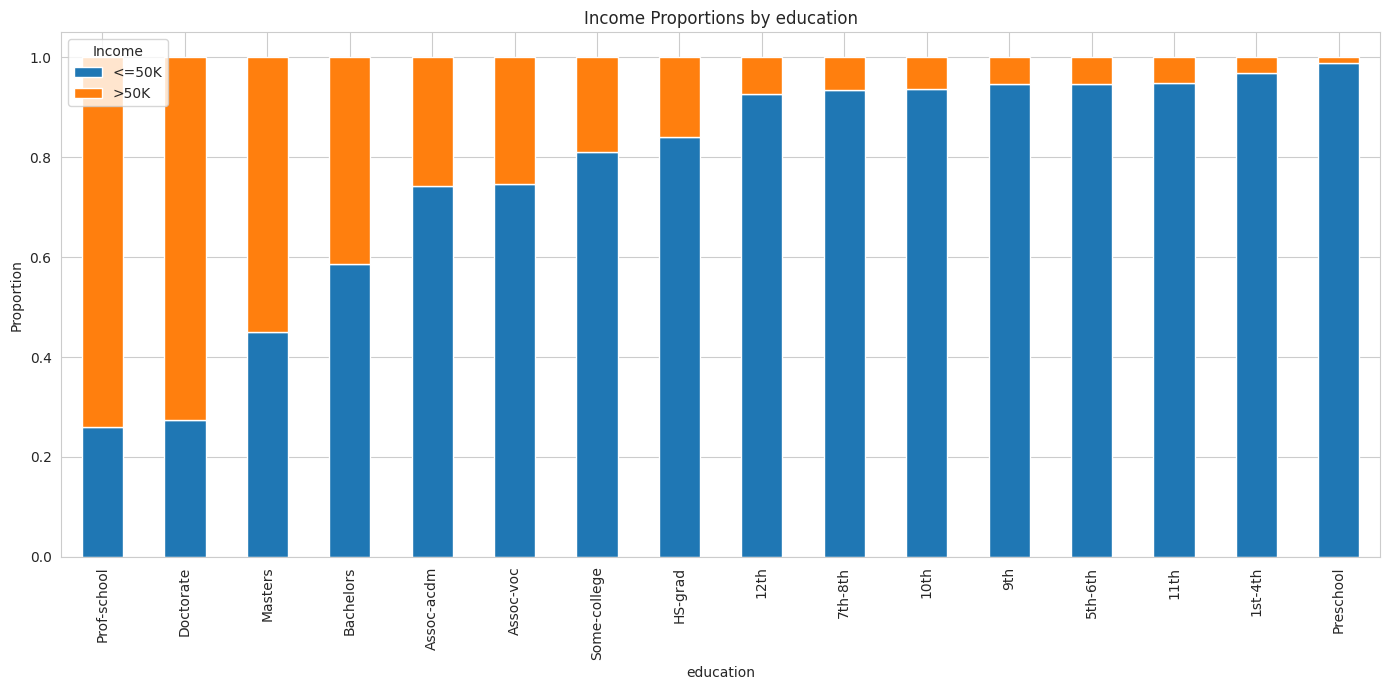

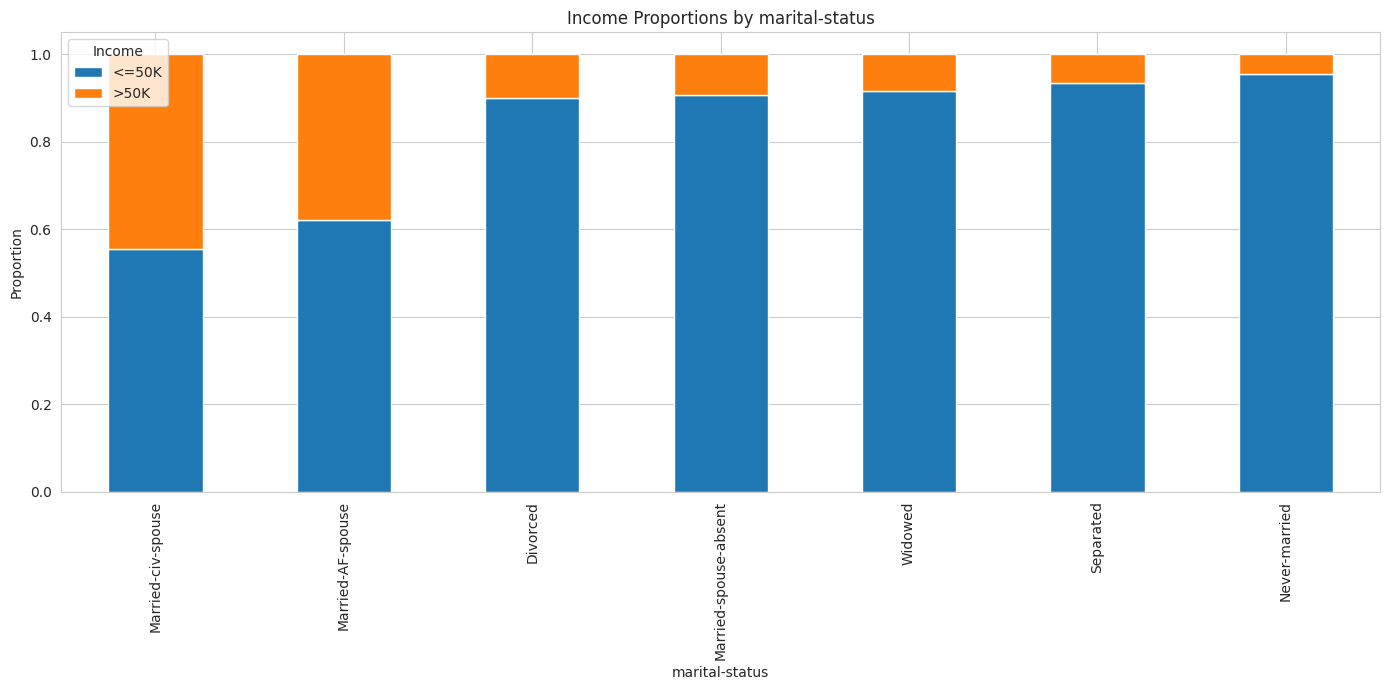

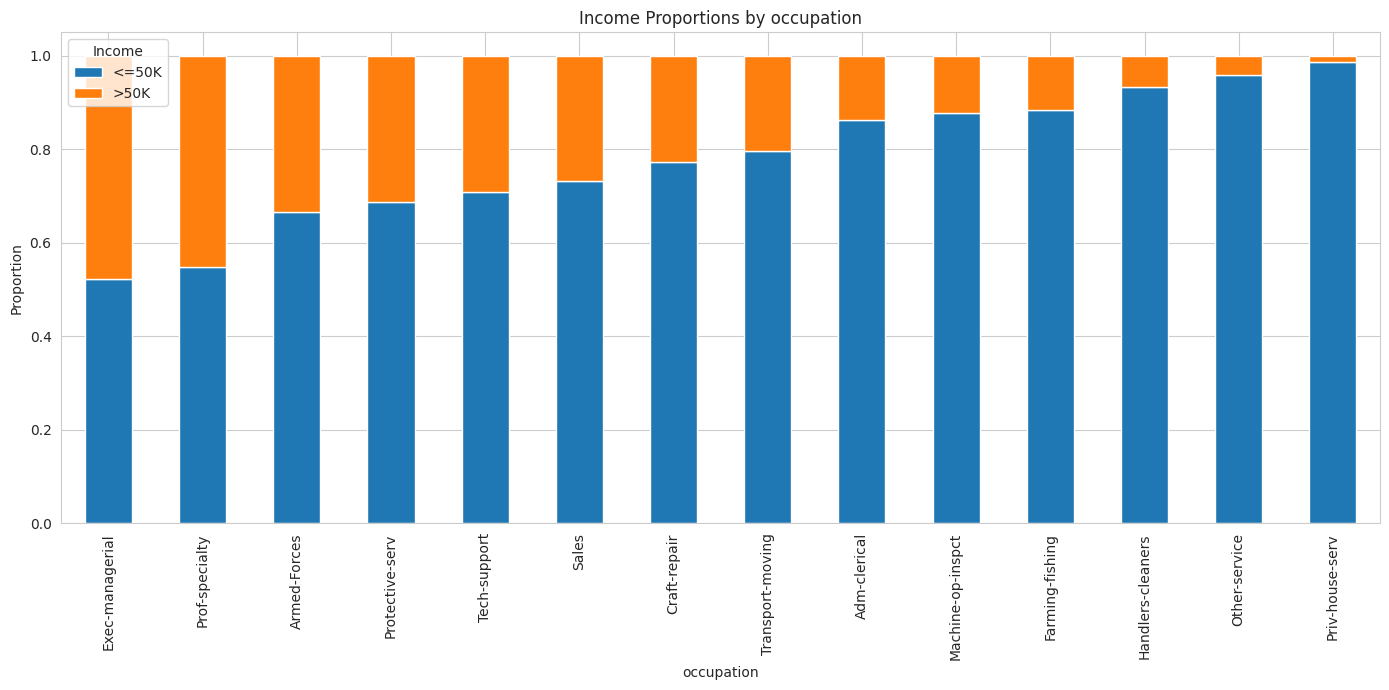

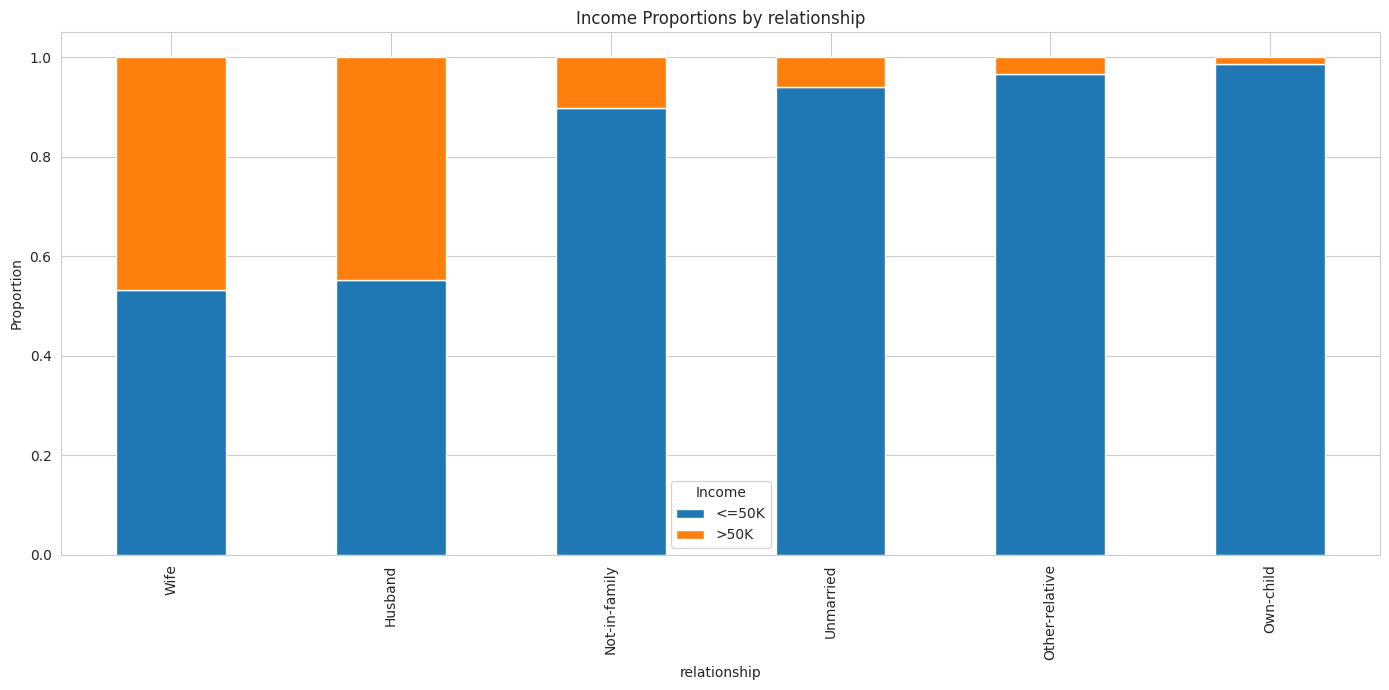

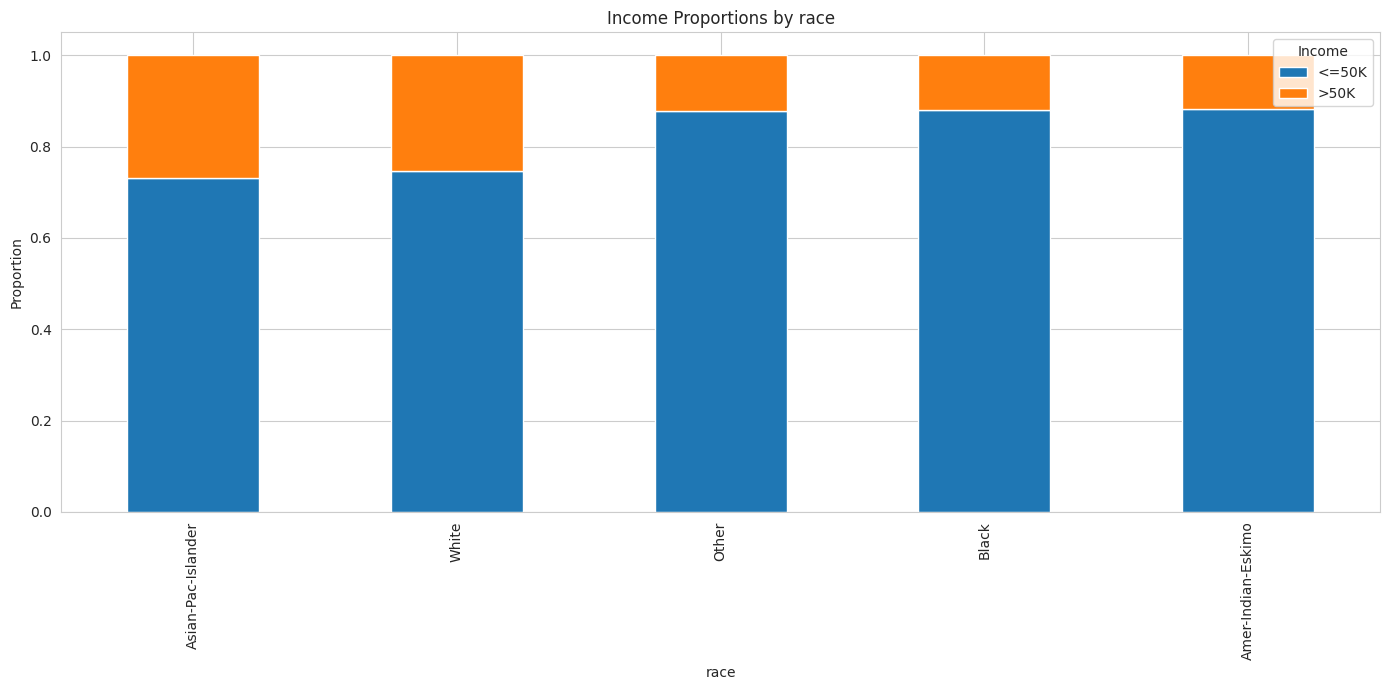

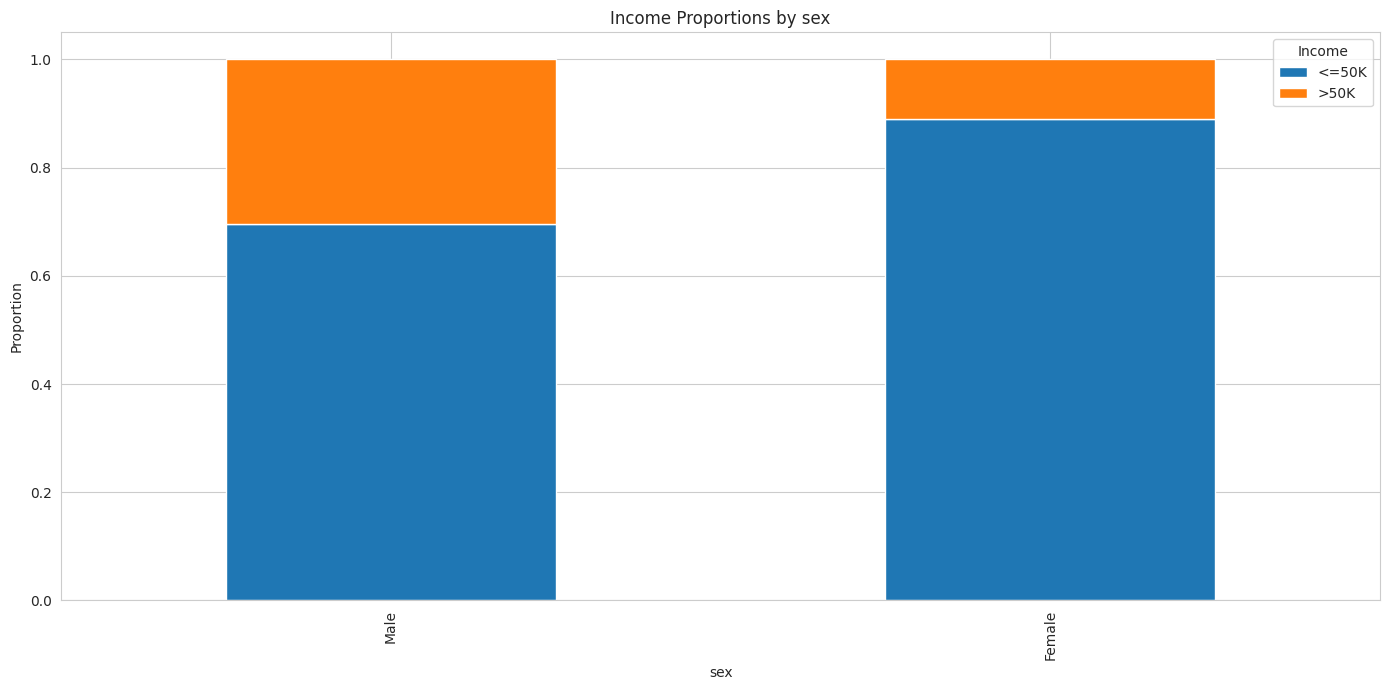

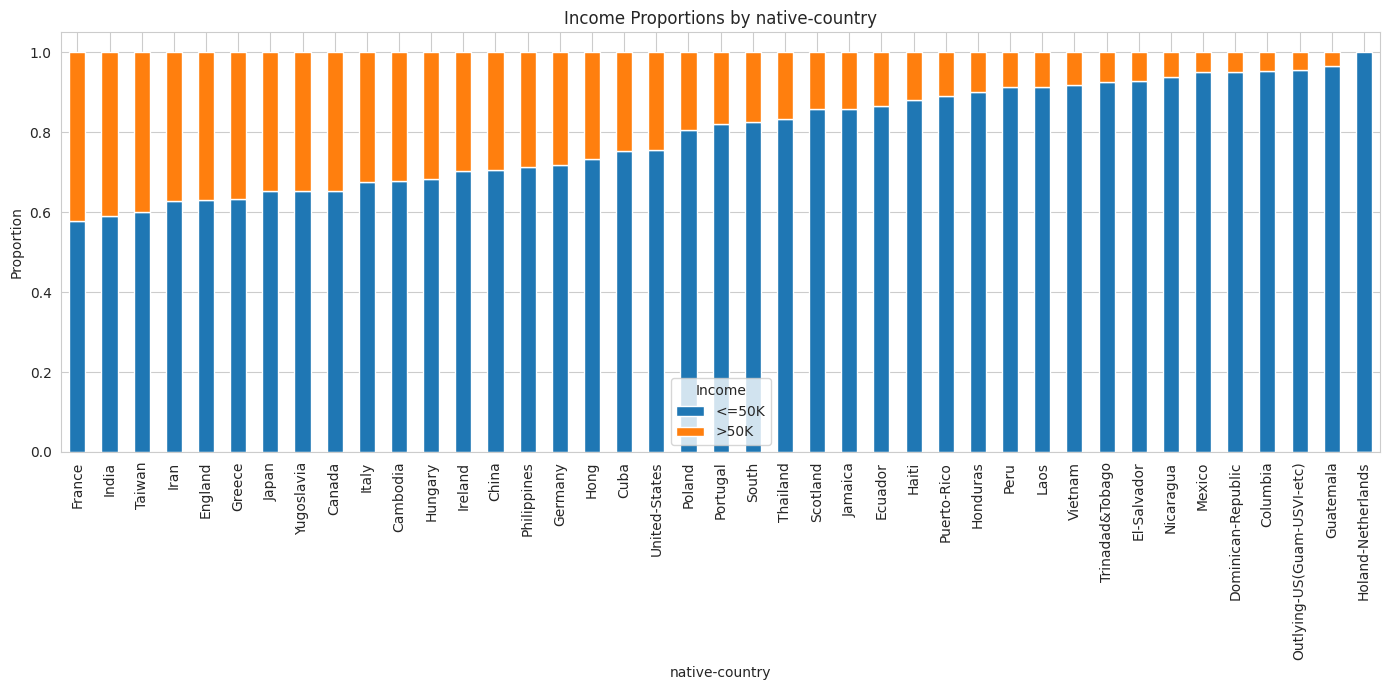

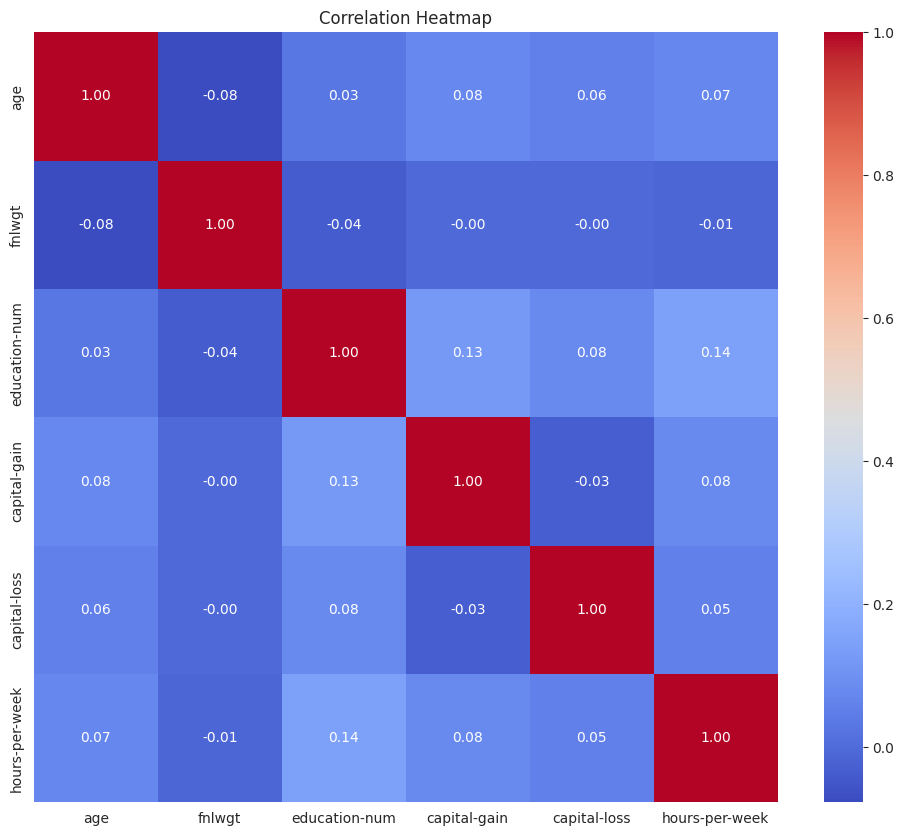

--- EDA Complete ---

--- Preprocessing ---
X shape: (45222, 40)

--- Model Training ---

Training: LogisticRegression
              precision    recall  f1-score   support

           0       0.94      0.78      0.85      6803
           1       0.56      0.84      0.68      2242

    accuracy                           0.80      9045
   macro avg       0.75      0.81      0.77      9045
weighted avg       0.85      0.80      0.81      9045


Training: RandomForest
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      6803
           1       0.68      0.65      0.66      2242

    accuracy                           0.84      9045
   macro avg       0.78      0.77      0.78      9045
weighted avg       0.84      0.84      0.84      9045


Training: KNN
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      6803
           1       0.68      0.58      0.63      2242

    accuracy            

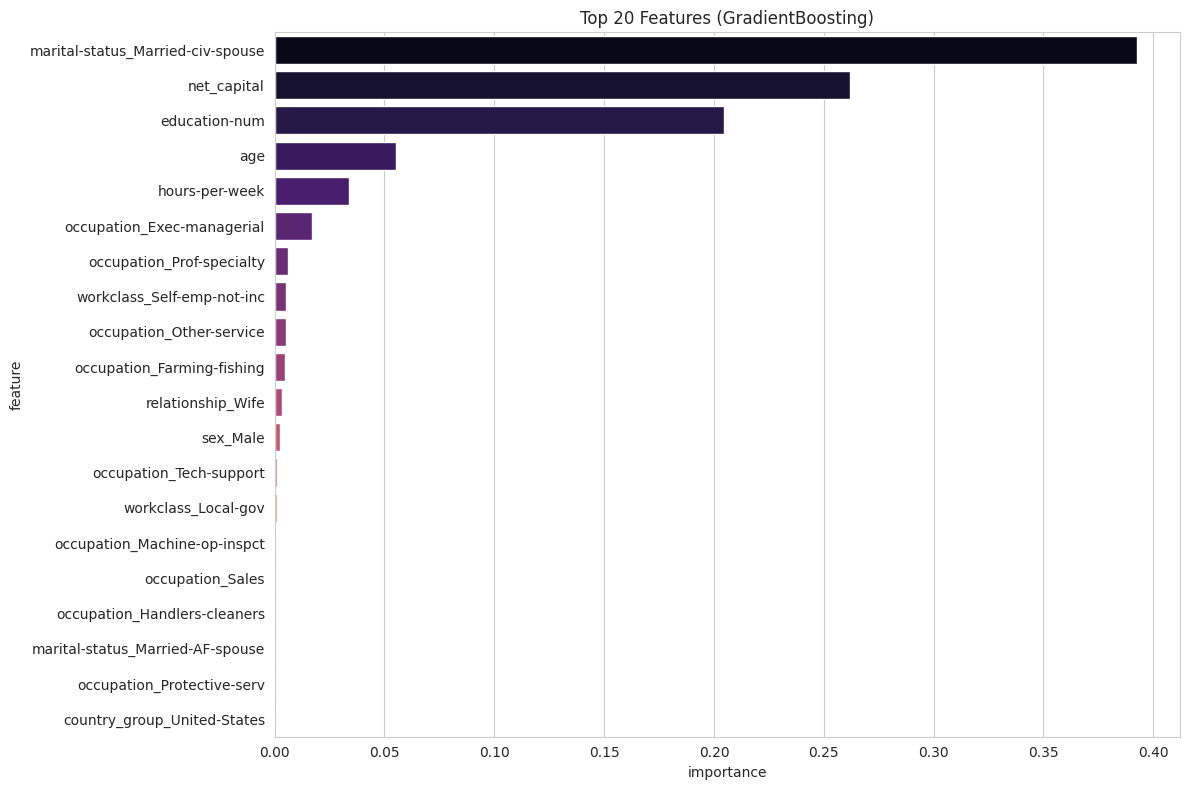


--- Comparative Metrics ---


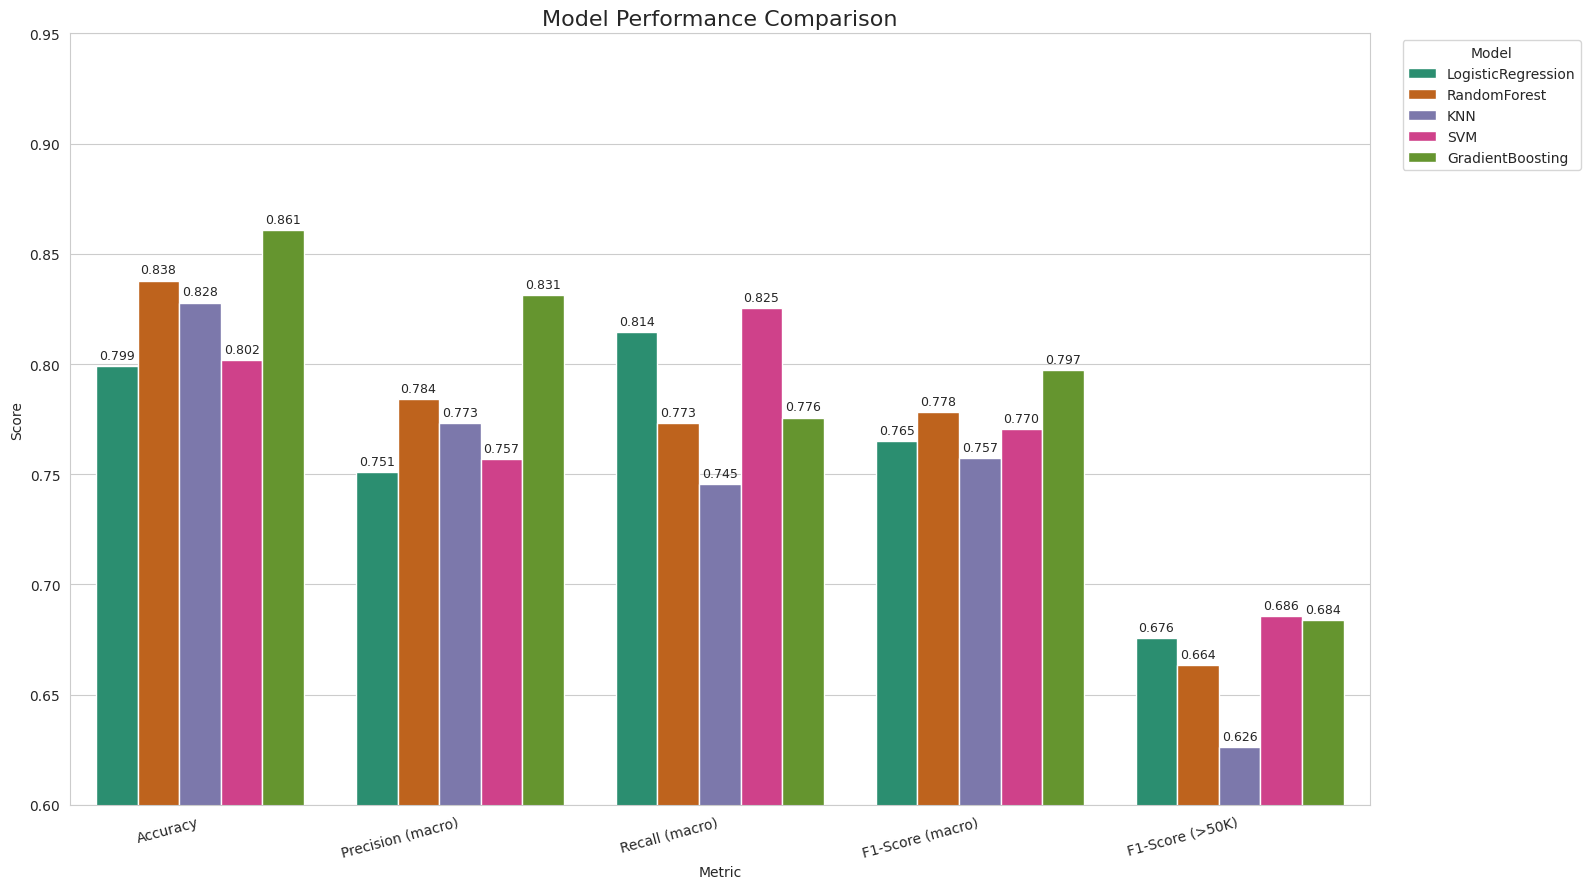

In [11]:
# Full Pipeline with Enhanced Colors Everywhere
# ==============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import joblib
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

# Load dataset
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
]
try:
    df = pd.read_csv(
        r"/content/drive/MyDrive/adult 3.csv",
        header=None, names=column_names,
        na_values='?', skipinitialspace=True, skiprows=[0]
    )
except FileNotFoundError:
    print("Error: File not found.")
    df = pd.DataFrame(columns=column_names)

print("--- Initial Data Info ---")
if not df.empty:
    df.info()
    print(df.head())
    print(df.isnull().sum())
else:
    print("Dataset is empty.")

if not df.empty:
    print("\n--- EDA ---")

    # Target
    plt.figure(figsize=(8, 6))
    sns.countplot(x='income', data=df, palette='Set2')
    plt.title('Income Classes')
    plt.show()

    # Numerical distributions
    numerical_features = df.select_dtypes(include=np.number).columns.tolist()
    df[numerical_features].hist(bins=20, figsize=(15, 10), layout=(3, 3), color='steelblue', edgecolor='black')
    plt.suptitle('Numerical Feature Distributions')
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

    # Categorical distributions
    categorical_features = df.select_dtypes(include='object').columns.tolist()
    if 'income' in categorical_features:
        categorical_features.remove('income')

    for col in categorical_features:
        plt.figure(figsize=(12, 6))
        sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='coolwarm')
        plt.title(f'{col} Distribution')
        plt.show()

    # Numerical vs Income
    for col in numerical_features:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='income', y=col, data=df, palette='Spectral')
        plt.title(f'{col} vs Income')
        plt.show()

    # Categorical vs Income (Proportions, improved colors)
    for col in categorical_features:
        prop_df = (df.groupby(col)['income']
                  .value_counts(normalize=True)
                  .unstack()
                  .sort_values(by='>50K', ascending=False))

        # Manually set better colors for income classes
        prop_df.plot(
            kind='bar',
            stacked=True,
            figsize=(14, 7),
            color=['#1f77b4', '#ff7f0e']  # Blue and Orange, instead of default yellow/blue
        )
        plt.title(f'Income Proportions by {col}')
        plt.ylabel('Proportion')
        plt.xlabel(col)
        plt.legend(title='Income', labels=['<=50K', '>50K'])
        plt.tight_layout()
        plt.show()

    # Correlation Heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()
    print("--- EDA Complete ---")

if not df.empty:
    print("\n--- Preprocessing ---")

    df.dropna(inplace=True)
    df['net_capital'] = df['capital-gain'] - df['capital-loss']
    df['country_group'] = df['native-country'].apply(lambda x: 'United-States' if x == 'United-States' else 'Other')
    df.drop(['education', 'capital-gain', 'capital-loss', 'native-country', 'fnlwgt'], axis=1, inplace=True)
    df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})
    X = df.drop('income', axis=1)
    y = df['income']
    X = pd.get_dummies(X, drop_first=True)

    print("X shape:", X.shape)

if not df.empty:
    print("\n--- Model Training ---")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y)

    scaler = StandardScaler()
    num_cols = X.select_dtypes(include=np.number).columns
    X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
    X_test[num_cols] = scaler.transform(X_test[num_cols])

    models = {
        "LogisticRegression": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
        "RandomForest": RandomForestClassifier(class_weight='balanced', random_state=42),
        "KNN": KNeighborsClassifier(),
        "SVM": SVC(class_weight='balanced', random_state=42),
        "GradientBoosting": GradientBoostingClassifier(random_state=42)
    }

    results_list = []
    for name, model in models.items():
        print(f"\nTraining: {name}")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        report = classification_report(y_test, y_pred, output_dict=True)
        results_list.append({
            'Model': name,
            'Accuracy': report['accuracy'],
            'Precision (macro)': report['macro avg']['precision'],
            'Recall (macro)': report['macro avg']['recall'],
            'F1-Score (macro)': report['macro avg']['f1-score'],
            'F1-Score (>50K)': report.get('1', {}).get('f1-score', 0)
        })
        print(classification_report(y_test, y_pred))

    results_df = pd.DataFrame(results_list)

if not df.empty:
    print("\n--- Model Comparison ---")
    results_df_sorted = results_df.sort_values(by='Accuracy', ascending=False)
    print(results_df_sorted)

    best_model_name = results_df_sorted.iloc[0]['Model']
    best_model = models[best_model_name]
    print(f"✅ Best Model: {best_model_name} with Accuracy {results_df_sorted.iloc[0]['Accuracy']:.4f}")
    joblib.dump(best_model, "best_model.pkl")
    print("✅ Model saved as best_model.pkl")

if not df.empty:
    print("\n--- Feature Importances ---")
    if hasattr(best_model, 'feature_importances_'):
        importances = best_model.feature_importances_
    elif hasattr(best_model, 'coef_'):
        importances = best_model.coef_[0]
    else:
        importances = None

    if importances is not None:
        fi = pd.DataFrame({'feature': X.columns, 'importance': np.abs(importances)})
        fi = fi.sort_values(by='importance', ascending=False).head(20)

        plt.figure(figsize=(12, 8))
        sns.barplot(x='importance', y='feature', data=fi, palette='magma')
        plt.title(f'Top 20 Features ({best_model_name})')
        plt.tight_layout()
        plt.show()
    else:
        print("Best model does not expose feature importances.")

if not df.empty:
    print("\n--- Comparative Metrics ---")
    plot_df = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

    plt.figure(figsize=(16, 9))
    ax = sns.barplot(x='Metric', y='Score', hue='Model', data=plot_df, palette='Dark2')

    plt.title('Model Performance Comparison', fontsize=16)
    plt.ylim(0.6, 0.95)
    plt.xticks(rotation=15, ha="right")
    plt.legend(title='Model', bbox_to_anchor=(1.02, 1), loc='upper left')

    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f', fontsize=9, padding=3)

    plt.tight_layout()
    plt.show()
